In [29]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [31]:
# 데이터 불러오기
digits = load_digits()
X = digits.images
y = digits.target

In [33]:
# (samples, 8, 8) → (samples, 64)로 변형
X = X.reshape((X.shape[0], -1))

In [35]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [41]:
# 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# DataLoader로 변환
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [45]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.fc1 = nn.Linear(64, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 10)  # 10 classes

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = DigitClassifier()

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 에폭 반복
for epoch in range(20):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 69.7711
Epoch 2, Loss: 16.0877
Epoch 3, Loss: 9.3182
Epoch 4, Loss: 6.5245
Epoch 5, Loss: 5.0668
Epoch 6, Loss: 4.0756
Epoch 7, Loss: 3.2337
Epoch 8, Loss: 3.0038
Epoch 9, Loss: 2.5546
Epoch 10, Loss: 2.0639
Epoch 11, Loss: 1.9057
Epoch 12, Loss: 1.6925
Epoch 13, Loss: 1.3958
Epoch 14, Loss: 1.2797
Epoch 15, Loss: 1.0794
Epoch 16, Loss: 0.9584
Epoch 17, Loss: 0.8476
Epoch 18, Loss: 0.8596
Epoch 19, Loss: 0.6519
Epoch 20, Loss: 0.5712


In [49]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 96.94%


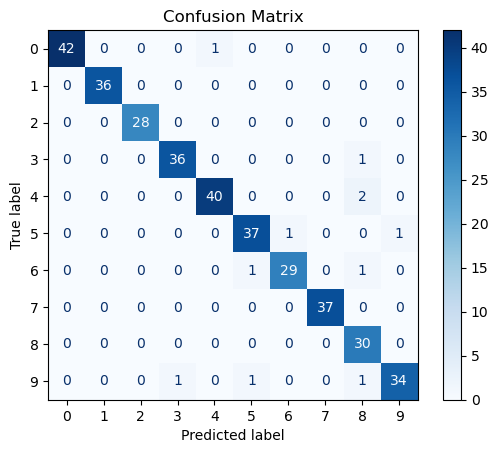

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 전체 예측값과 실제값 저장
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# confusion matrix 계산 및 출력
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()